# Titanic Outcompte
$Fonte:$ https://www.youtube.com/watch?v=j4XvJEbaVJg

## Importações

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv("train.csv", sep=",")
test_df = pd.read_csv("test.csv", sep=",")

In [3]:
train_df.shape, test_df.shape

((891, 12), (418, 11))

## Analise da Base

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


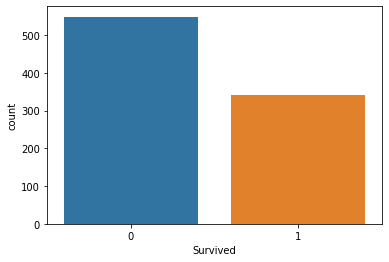

In [5]:
sns.countplot(x='Survived', data=train_df);

<AxesSubplot:xlabel='Survived', ylabel='count'>

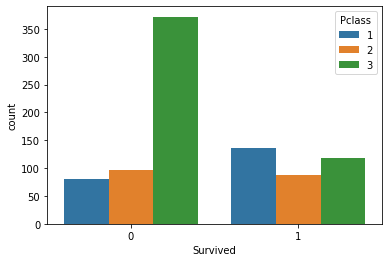

In [6]:
sns.countplot(x='Survived', data=train_df, hue="Pclass")

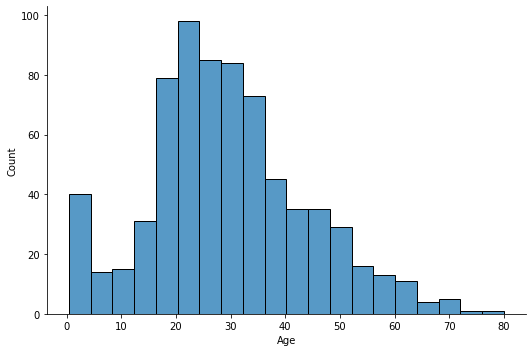

In [7]:
sns.displot(train_df['Age'],kde= False, aspect=1.5)

## Trantando Missing

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

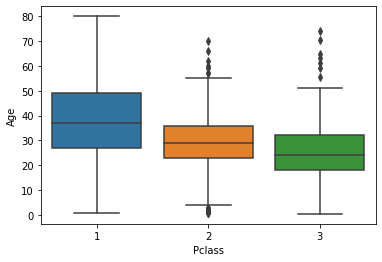

In [10]:
sns.boxplot(x="Pclass", y="Age", data=train_df)

### Completando feature "Age"
Usando a média das idades por tipo de classe

In [11]:
print(train_df[train_df['Pclass']==1]['Age'].mean())
print(train_df[train_df['Pclass']==2]['Age'].mean())
print(train_df[train_df['Pclass']==3]['Age'].mean())

38.233440860215055
29.87763005780347
25.14061971830986


In [12]:
#mean_age_pcla1 = round(train_df[train_df['Pclass']==1]['Age'].mean())
#mean_age_pcla2 = round(train_df[train_df['Pclass']==2]['Age'].mean())
#mean_age_pcla3 = round(train_df[train_df['Pclass']==3]['Age'].mean())

In [13]:
train_df['Age'].fillna(-1, inplace= True)

In [14]:
def fill_in_na_values(cols):
    age = cols[0]
    pclass = cols[1]
    
    if (age==-1):
        if pclass == 1:
            return round(train_df[train_df['Pclass']==1]['Age'].mean())
        elif pclass == 2:
            return round(train_df[train_df['Pclass']==2]['Age'].mean())
        elif pclass == 3:
            return round(train_df[train_df['Pclass']==3]['Age'].mean())
    else:
        return age
        
train_df['Age'] = train_df[['Age', 'Pclass']].apply(fill_in_na_values, axis=1)

In [15]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

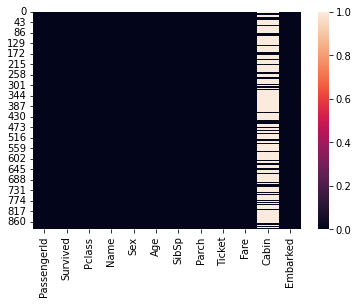

In [16]:
sns.heatmap(train_df.isnull(), )

### Eliminando cabin porque não tem relevancia no modelo e possui muitos nulos

In [17]:

train_df.drop(['Cabin'], axis=1, inplace=True)

In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [19]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Tratando colunas com poucos NaN
Embarked só possui 02 linhas nulas então vamos deleta-la

In [20]:
train_df.dropna(inplace=True)

In [22]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Deletando

vamos deletar PassagerId, name e Ticket, porque não possuem muita correlação com target

In [23]:
train_df.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace=True)

In [24]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Converter Dummies()
Convertendo dados tipos string para numéricos
Sex e Embarked

In [25]:
train_df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [27]:
train_df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [33]:
sex = pd.get_dummies(train_df['Sex'], drop_first=True)

In [34]:
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [31]:
embarked = pd.get_dummies(train_df['Embarked'], drop_first=True)

In [32]:
embarked

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [35]:
train_df.drop(['Sex', 'Embarked'], axis=1, inplace=True)

In [36]:
train_df = pd.concat([train_df, sex, embarked], axis=1)

In [38]:
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


## Prepocessamento

In [46]:
from sklearn.model_selection import train_test_split

X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state=42)

In [47]:
X_train.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S'], dtype='object')

In [50]:
from sklearn.preprocessing import MinMaxScaler

cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S']

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=cols)

X_test = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test, columns=cols)

In [51]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1.0,0.220910,0.0,0.0,0.015713,1.0,0.0,1.0
1,1.0,0.384267,0.0,0.0,0.015469,1.0,0.0,1.0
2,1.0,0.271174,0.0,0.0,0.019202,0.0,0.0,1.0
3,1.0,0.271174,0.0,0.0,0.014151,1.0,0.0,1.0
4,1.0,0.409399,0.0,0.0,0.015176,1.0,0.0,1.0


## Modelo SVM

### Ajustando e treinando modelo

In [52]:
from sklearn.svm import SVC

modelo_svm = SVC()
modelo_svm.fit(X_train, y_train)


SVC()

In [55]:
y_predito = modelo_svm.predict(X_test)

### validando modelo

In [57]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_predito))
print(confusion_matrix(y_test, y_predito))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89        58
           1       0.85      0.71      0.77        31

    accuracy                           0.85        89
   macro avg       0.85      0.82      0.83        89
weighted avg       0.85      0.85      0.85        89

[[54  4]
 [ 9 22]]


In [64]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.5,1,10, 50, 100, 1000 ], 'gamma':[1,0.1,0.001, 0.0001, 0.00001, 0.000001]}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=True )

grid.fit(X_train, y_train)
grid_predito = grid.predict(X_test)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [65]:
print(classification_report(y_test, grid_predito))
print(confusion_matrix(y_test, grid_predito))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88        58
           1       0.79      0.74      0.77        31

    accuracy                           0.84        89
   macro avg       0.83      0.82      0.82        89
weighted avg       0.84      0.84      0.84        89

[[52  6]
 [ 8 23]]
